## Import Dataset
* Read all the data files from previous seasons
* Keep only required columns
* Concatenate the data from the files together
* Import the concatenated data into a data frame

In [1]:
import pandas as pd
from glob import glob

req_cols = ['Date', 'HomeTeam', 'AwayTeam', 
            'HTHG', 'HTAG', 'HTR', 'FTHG', 'FTAG', 'FTR',
            'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 
            'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
all_df = []
for file in glob('../data/*.csv'):
    print('reading', file)
    df = pd.read_csv(file, usecols=req_cols)
    df = df[req_cols]
    all_df.append(df)

concat_df = pd.concat(all_df, axis=0, sort=False)
concat_df.to_csv('../data/combined/combined_data.csv', index=None)
print('All data read and saved.')
    
data = pd.read_csv('../data/combined/combined_data.csv')
print(data.shape[0], 'matches')
data.head(5)

reading ../data/season-2013-2014.csv
reading ../data/season-2017-2018.csv
reading ../data/season-2012-2013.csv
reading ../data/season-2015-2016.csv
reading ../data/season-2014-2015.csv
reading ../data/season-2011-2012.csv
reading ../data/season-2010-2011.csv
reading ../data/season-2019-2020.csv
reading ../data/season-2016-2017.csv
reading ../data/season-2018-2019.csv
All data read and saved.
3630 matches


,Date,HomeTeam,AwayTeam,HTHG,HTAG,HTR,FTHG,FTAG,FTR,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,17/08/13,Arsenal,Aston Villa,1.0,1.0,D,1.0,3.0,A,16.0,...,4.0,4.0,4.0,3.0,15.0,18.0,4.0,5.0,1.0,0.0
1,17/08/13,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,...,11.0,4.0,12.0,6.0,11.0,11.0,1.0,1.0,0.0,0.0
2,17/08/13,Norwich,Everton,0.0,0.0,D,2.0,2.0,D,8.0,...,2.0,6.0,6.0,8.0,13.0,10.0,2.0,0.0,0.0,0.0
3,17/08/13,Sunderland,Fulham,0.0,0.0,D,0.0,1.0,A,20.0,...,3.0,1.0,6.0,1.0,14.0,14.0,0.0,3.0,0.0,0.0
4,17/08/13,Swansea,Man United,0.0,2.0,A,1.0,4.0,A,17.0,...,6.0,7.0,7.0,4.0,13.0,10.0,1.0,3.0,0.0,0.0


### Obtain team names
* Read the current season's data file
* Obtain the list of home teams from the records
* Find the unique teams from the home teams list

In [2]:
curr_df = pd.read_csv('../data/season-2018-2019.csv')

home_teams = curr_df['HomeTeam']

teams = []
for t in home_teams:
    if t not in teams:
        teams.append(t)
        
teams_df = pd.DataFrame(teams, columns=["Teams"])
display(teams_df)

,Teams
0,Man United
1,Bournemouth
2,Fulham
3,Huddersfield
4,Newcastle
5,Watford
6,Wolves
7,Arsenal
8,Liverpool
9,Southampton


## Data Analysis

### Inspect the columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 21 columns):
Date        3629 non-null object
HomeTeam    3629 non-null object
AwayTeam    3629 non-null object
HTHG        3629 non-null float64
HTAG        3629 non-null float64
HTR         3629 non-null object
FTHG        3629 non-null float64
FTAG        3629 non-null float64
FTR         3629 non-null object
HS          3629 non-null float64
AS          3629 non-null float64
HST         3629 non-null float64
AST         3629 non-null float64
HC          3629 non-null float64
AC          3629 non-null float64
HF          3629 non-null float64
AF          3629 non-null float64
HY          3629 non-null float64
AY          3629 non-null float64
HR          3629 non-null float64
AR          3629 non-null float64
dtypes: float64(16), object(5)
memory usage: 595.7+ KB


### Home Team win rate

In [4]:
total_matches = data.shape[0]
print('Total matches:', total_matches)

total_home_wins = len(data[data['FTR'] == 'H'])
print('Total Home team wins:', total_home_wins)

home_wins_rate = (total_home_wins/total_matches)*100
print('Home wins rate: %.2f' % home_wins_rate,'%')

Total matches: 3630
Total Home team wins: 1657
Home wins rate: 45.65 %


### Team Statistics

In [5]:
def getData(team):
    print('\n______________', team, '______________\n')
    
    home_games = data[data['HomeTeam'] == team]
    away_games = data[data['AwayTeam'] == team]
    total_games = home_games.append(away_games)
    num_games = len(total_games.index)
    print('Total games played:', num_games)
    
    games_won = total_games[total_games['FTR'] == 'H']
    num_games_won = len(games_won.index)
    print('Total games won:', num_games_won)
    games_lost = total_games[total_games['FTR'] == 'A']
    num_games_lost = len(games_lost.index)
    print('Total games lost:', num_games_lost)
    games_drawn = total_games[total_games['FTR'] == 'D']
    num_games_drawn = len(games_drawn.index)
    print('Total games drawn:', num_games_drawn)
    
    games_won_rate = 0
    games_lost_rate = 0
    games_drawn_rate = 0
    if num_games != 0:
        games_won_rate = num_games_won / num_games
        print('Win percentage: %.2f' % (games_won_rate*100),'%')
        games_lost_rate = num_games_lost / num_games
        print('Lose percentage: %.2f' % (games_lost_rate*100),'%')
        games_drawn_rate = num_games_drawn / num_games
        print('Draw percentage: %.2f' % (games_drawn_rate*100),'%')
    
    home_goals = home_games['FTHG'].sum()
    away_goals = away_games['FTAG'].sum()
    total_goals = int(home_goals + away_goals)
    print('Total goals scored:', total_goals)
    
    home_goals_conc = home_games['FTAG'].sum()
    away_goals_conc = away_games['FTHG'].sum()
    total_goals_conc = int(home_goals_conc + away_goals_conc)
    print('Total goals conceded:', total_goals_conc)
    
    if num_games != 0:
        GPG = total_goals / num_games
        print('Goals scored per game: %.2f' % GPG)
        GCPG = total_goals_conc / num_games
        print('Goals conceded per game %.2f:' % GCPG)
    
    home_shots = home_games['HS'].sum()
    away_shots = away_games['AS'].sum()
    total_shots = int(home_shots + away_shots)
    print('Total shots hit:', total_shots)
    
    home_shots_ontarget = home_games['HST'].sum()
    away_shots_ontarget = away_games['AST'].sum()
    total_shots_ontarget = int(home_shots_ontarget + away_shots_ontarget)
    print('Total shots on target:', total_shots_ontarget)
    
    home_shots_against = home_games['AS'].sum()
    away_shots_against = away_games['HS'].sum()
    total_shots_against = int(home_shots_against + away_shots_against)
    print('Total shots allowed:', total_shots_against)
    
    if num_games != 0:
        HSPG = home_shots / num_games
        print('Shots taken per game: %.2f' % HSPG)
        ASPG = away_goals / num_games
        print('Shots allowed per game: %.2f' % ASPG)
    
    scoring_rate = 0
    if total_shots != 0:
        scoring_rate = (total_shots - total_goals) / total_shots
    print('Goal Scoring percentage: %2.f' % (scoring_rate*100),'%')
    
    home_yellow_cards = home_games['HY'].sum()
    away_yellow_cards = away_games['AY'].sum()
    total_yellow_cards = int(home_yellow_cards + away_yellow_cards)
    print('Total yellow cards received:', total_yellow_cards)
    
    home_red_cards = home_games['HR'].sum()
    away_red_cards = away_games['AR'].sum()
    total_red_cards = int(home_red_cards + away_red_cards)
    print('Total red cards received:', total_red_cards)
    
    home_fouls = home_games['HF'].sum()
    away_fouls = away_games['AF'].sum()
    total_fouls = int(home_fouls + away_fouls)
    print('Total fouls committed:', total_fouls)
    
    if num_games == 0: 
        games_won = 0
        games_lost = 0
        games_drawn = 0 
        total_goals = 0 
        total_shots_ontarget = 0 
        total_goals_conc = 0 
        total_yellow_cards = 0 
        total_red_cards = 0 
        total_fouls = 0 
        total_shots = 0 
        total_shots_against = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        scoring_rate = 0 
        
    return [team, num_games, num_games_won, games_won_rate, num_games_lost, 
            num_games_drawn, total_goals, scoring_rate, total_goals_conc, 
            total_shots, total_shots_ontarget, total_shots_against, 
            total_fouls, total_yellow_cards, total_red_cards]

In [6]:
stat_list = []
for team in teams:
    stat = getData(team)
    stat_list.append(stat)
    
team_stats = pd.DataFrame(
    stat_list, 
    columns=['Team', 'Games', 'Wins', 'Win Rate', 'Losses', 'Draws', 
            'Goals scored', 'Scoring Rate', 'Goals Conceded', 
            'Shots', 'Shots on Target', 'Shots Against', 'Fouls', 
            'Yellow Cards', 'Red Cards'])


______________ Man United ______________

Total games played: 363
Total games won: 170
Total games lost: 109
Total games drawn: 84
Win percentage: 46.83 %
Lose percentage: 30.03 %
Draw percentage: 23.14 %
Total goals scored: 647
Total goals conceded: 364
Goals scored per game: 1.78
Goals conceded per game 1.00:
Total shots hit: 5050
Total shots on target: 2218
Total shots allowed: 4047
Shots taken per game: 7.85
Shots allowed per game: 0.79
Goal Scoring percentage: 87 %
Total yellow cards received: 615
Total red cards received: 21
Total fouls committed: 4010

______________ Bournemouth ______________

Total games played: 173
Total games won: 79
Total games lost: 53
Total games drawn: 41
Win percentage: 45.66 %
Lose percentage: 30.64 %
Draw percentage: 23.70 %
Total goals scored: 221
Total goals conceded: 297
Goals scored per game: 1.28
Goals conceded per game 1.72:
Total shots hit: 2039
Total shots on target: 694
Total shots allowed: 2367
Shots taken per game: 6.31
Shots allowed per g

Total games played: 363
Total games won: 184
Total games lost: 119
Total games drawn: 60
Win percentage: 50.69 %
Lose percentage: 32.78 %
Draw percentage: 16.53 %
Total goals scored: 812
Total goals conceded: 325
Goals scored per game: 2.24
Goals conceded per game 0.90:
Total shots hit: 6090
Total shots on target: 2586
Total shots allowed: 3171
Shots taken per game: 9.10
Shots allowed per game: 0.95
Goal Scoring percentage: 87 %
Total yellow cards received: 615
Total red cards received: 25
Total fouls committed: 3807

______________ Crystal Palace ______________

Total games played: 249
Total games won: 98
Total games lost: 97
Total games drawn: 54
Win percentage: 39.36 %
Lose percentage: 38.96 %
Draw percentage: 21.69 %
Total goals scored: 284
Total goals conceded: 344
Goals scored per game: 1.14
Goals conceded per game 1.38:
Total shots hit: 2929
Total shots on target: 937
Total shots allowed: 3408
Shots taken per game: 6.51
Shots allowed per game: 0.58
Goal Scoring percentage: 90 %


In [7]:
display(team_stats)
team_stats.to_csv('../data/statistics/team_stats.csv')

,Team,Games,Wins,Win Rate,Losses,Draws,Goals scored,Scoring Rate,Goals Conceded,Shots,Shots on Target,Shots Against,Fouls,Yellow Cards,Red Cards
0,Man United,363,170,0.468320,109,84,647,0.871881,364,5050,2218,4047,4010,615,21
1,Bournemouth,173,79,0.456647,53,41,221,0.891614,297,2039,694,2367,1606,261,7
2,Fulham,190,90,0.473684,54,46,221,0.901952,320,2254,1093,2829,1985,278,7
3,Huddersfield,76,33,0.434211,26,17,50,0.934211,134,760,229,961,816,116,7
4,Newcastle,325,157,0.483077,95,73,385,0.901307,491,3901,1600,4150,3543,531,32
5,Watford,173,82,0.473988,52,39,193,0.902525,275,1980,629,2212,2093,343,19
6,Wolves,135,59,0.437037,41,35,163,0.893185,221,1526,674,1813,1420,234,9
7,Arsenal,363,177,0.487603,103,83,674,0.873022,418,5308,2356,4034,3655,587,33
8,Liverpool,362,168,0.464088,108,86,693,0.880414,391,5795,2458,3536,3615,509,20
9,Southampton,287,118,0.411150,88,81,364,0.903346,387,3766,1346,3345,3220,438,20


### Goal Scoring analysis

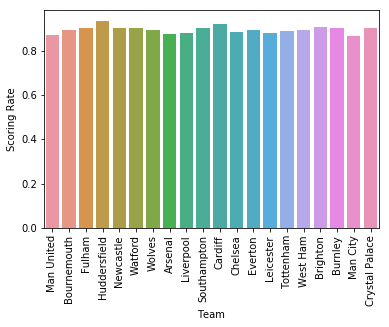

In [8]:
import seaborn as sns

GS = sns.barplot(team_stats['Team'], team_stats['Scoring Rate'])
for item in GS.get_xticklabels():
    item.set_rotation(90)

### Win Analysis

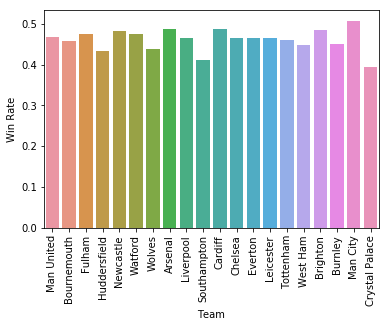

In [9]:
WR = sns.barplot(team_stats['Team'], team_stats['Win Rate'])
for item in WR.get_xticklabels():
    item.set_rotation(90)

### Goals and Shots analysis

<Figure size 432x288 with 0 Axes>

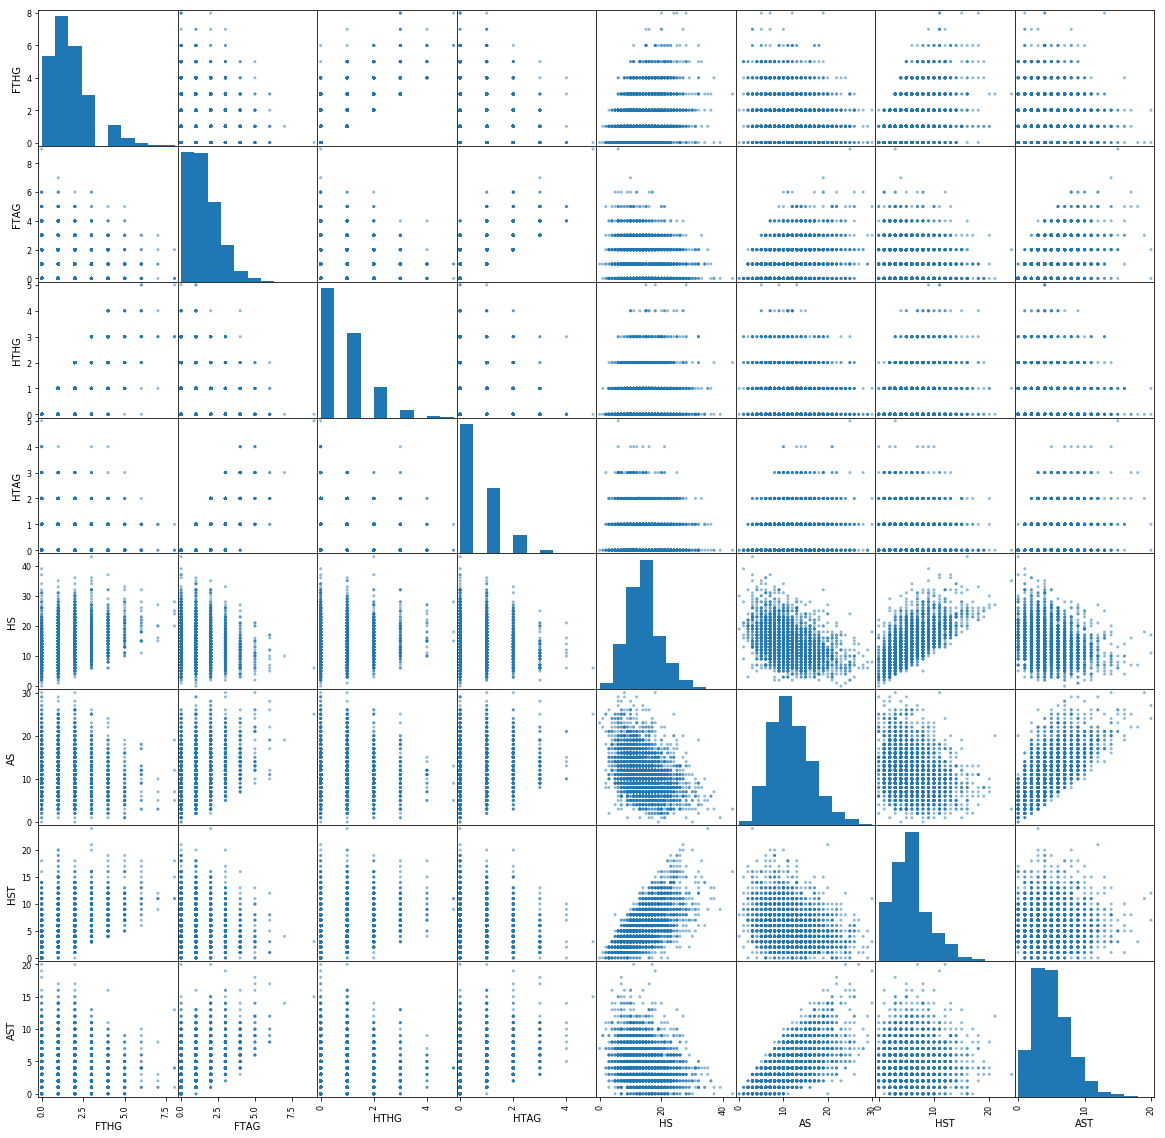

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']], 
               figsize=(20,20))
plt.show()